Things i need to do:
- data vis
- make note of hyperparameter tuning process (most important part of presentation)
- goal: minimize false positive rate (high precision, high accuracy)

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score,train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score, roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.ensemble import BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier
import itertools as it

In [10]:
data = pd.read_csv('movies_classification_updated.csv', index_col='Unnamed: 0')

In [12]:
data.isna().sum()

belongs_to_collection      0
budget                     0
revenue                    0
runtime                  251
title                      0
Animation                  0
Comedy                     0
Family                     0
Adventure                  0
Fantasy                    0
Romance                    0
Drama                      0
Action                     0
Crime                      0
Thriller                   0
Horror                     0
History                    0
Science Fiction            0
Mystery                    0
War                        0
Foreign                    0
Music                      0
Documentary                0
Western                    0
TV Movie                   0
english                    0
release_year              78
release_month             78
dtype: int64

In [19]:
y = data.revenue
X = data.drop(['revenue', 'title'], axis = 1)

In [20]:
# splitting test/train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 45)

Not scaling the data: Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.

In [28]:
X_train.shape

(33522, 29)

In [21]:
# making base model to find the range of hyperparameters
model = DecisionTreeClassifier(random_state = 1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [27]:
# accuracy/recall without tuning
pred=model.predict(X_test)
print('accuracy:', accuracy_score(y_test, pred))
print('recall:', recall_score(y_test, pred))
print("Precision: ", precision_score(y_test, pred))

accuracy: 0.87282978342581
recall: 0.6400873839432004
Precision:  0.6059979317476732


In [25]:
# finding range of hyperparameters
print("Maximum tree depth =", model.get_depth())
print("Maximum leaves =", model.get_n_leaves())

Maximum tree depth = 31
Maximum leaves = 2810


In [36]:
# coarse grid search
parameters = {'max_depth':range(2,31, 5),
              'max_leaf_nodes':range(2, 2810, 100), 
              'max_features': range(1, 29, 5)}

cv = KFold(n_splits = 5,shuffle=True,random_state=1)

grid_result = GridSearchCV(DecisionTreeClassifier(random_state=1), parameters, n_jobs=-1,verbose=1,cv=cv,
                    scoring='precision')

grid_result.fit(X_train, y_train)

Fitting 5 folds for each of 1044 candidates, totalling 5220 fits


AttributeError: 'DecisionTreeClassifier' object has no attribute 'best_score_'

In [37]:
print(grid_result.best_score_, grid_result.best_params_) 

0.8242467211874571 {'max_depth': 2, 'max_features': 6, 'max_leaf_nodes': 102}


In [39]:
pd.DataFrame(grid_result.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
141,0.039299,0.000927,0.009908,0.000856,2,21,2502,"{'max_depth': 2, 'max_features': 21, 'max_leaf...",0.826265,0.786546,0.828283,0.826446,0.853693,0.824247,0.021511,1
105,0.042300,0.003355,0.011700,0.001364,2,16,1802,"{'max_depth': 2, 'max_features': 16, 'max_leaf...",0.826265,0.786546,0.828283,0.826446,0.853693,0.824247,0.021511,1
106,0.038600,0.001654,0.009200,0.001209,2,16,1902,"{'max_depth': 2, 'max_features': 16, 'max_leaf...",0.826265,0.786546,0.828283,0.826446,0.853693,0.824247,0.021511,1
107,0.040807,0.004044,0.009593,0.002225,2,16,2002,"{'max_depth': 2, 'max_features': 16, 'max_leaf...",0.826265,0.786546,0.828283,0.826446,0.853693,0.824247,0.021511,1
108,0.038100,0.001772,0.009701,0.001965,2,16,2102,"{'max_depth': 2, 'max_features': 16, 'max_leaf...",0.826265,0.786546,0.828283,0.826446,0.853693,0.824247,0.021511,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,0.023910,0.001140,0.014861,0.005693,7,1,2,"{'max_depth': 7, 'max_features': 1, 'max_leaf_...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1039
696,0.027261,0.001942,0.013219,0.003202,22,1,2,"{'max_depth': 22, 'max_features': 1, 'max_leaf...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1039
348,0.023600,0.001593,0.027268,0.012800,12,1,2,"{'max_depth': 12, 'max_features': 1, 'max_leaf...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1039
870,0.025075,0.000733,0.011584,0.001607,27,1,2,"{'max_depth': 27, 'max_features': 1, 'max_leaf...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1039


In [33]:
model = DecisionTreeClassifier(random_state = 1, max_depth= 2, max_features = 6, max_leaf_nodes = 102)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_features=6, max_leaf_nodes=102,
                       random_state=1)

In [34]:
# accuracy/recall
pred=model.predict(X_test)
print('accuracy:', accuracy_score(y_test, pred))
print('recall:', recall_score(y_test, pred))
print("Precision: ", precision_score(y_test, pred))

accuracy: 0.9053159119384285
recall: 0.547788093937739
Precision:  0.813463098134631


With the hyperparameters tuned based on maximizing precision, the precision has increased by 20%, the accuracy by 3%, and the recall has decrease by 10%. Let's do a finer grid search focused on precision and plot the precision-accuracy curve to find the optimal hyperparameters. I also need to find the optimal decision threshold probability.

In [40]:
# finer grid search
parameters = {'max_depth':range(2,10, 2),
              'max_leaf_nodes':range(2000, 2810, 25), 
              'max_features': range(16, 29, 2)}

cv = KFold(n_splits = 5,shuffle=True,random_state=1)

grid_result = GridSearchCV(DecisionTreeClassifier(random_state=1), parameters, n_jobs=-1,verbose=1,cv=cv,
                    scoring='precision')

grid_result.fit(X_train, y_train)
print (grid_result.best_score_, grid_result.best_params_) 

Fitting 5 folds for each of 924 candidates, totalling 4620 fits
0.8851779474566996 {'max_depth': 2, 'max_features': 28, 'max_leaf_nodes': 2000}


In [41]:
model = DecisionTreeClassifier(random_state = 1, max_depth= 2, max_features = 28, max_leaf_nodes = 2000)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_features=28, max_leaf_nodes=2000,
                       random_state=1)

In [42]:
# accuracy/recall
pred=model.predict(X_test)
print('accuracy:', accuracy_score(y_test, pred))
print('recall:', recall_score(y_test, pred))
print("Precision: ", precision_score(y_test, pred))

accuracy: 0.9033470556649364
recall: 0.4565811032222829
Precision:  0.9077090119435396


With the finer grid search parameters, the accuracy stayed about the same, the recall dropped about 10%, and the precision increased by almost 10%. 

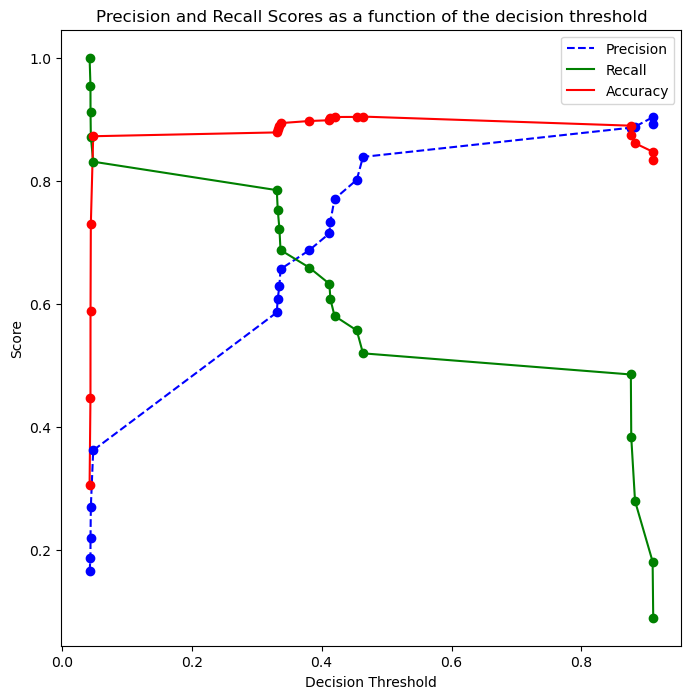

In [62]:
# Note that we are using the cross-validated predicted probabilities, instead of directly using the 
# predicted probabilities on train data, as the model may be overfitting on the train data, and 
# may lead to misleading results

cross_val_ypred = cross_val_predict(model, X_train, y_train, cv = 5, method = 'predict_proba')

p, r, thresholds = precision_recall_curve(y_train, cross_val_ypred[:,1])
acc = np.ndarray(shape = (len(thresholds),))
i = 0
for th in thresholds:
    y_pred = cross_val_ypred[:,1] > th
    y_pred = y_pred.astype(int)
    acc[i] = accuracy_score(y_pred, y_train)
    i = i + 1
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.plot(thresholds, acc, "r-", label="Accuracy")
    plt.plot(thresholds, precisions[:-1], "o", color = 'blue')
    plt.plot(thresholds, recalls[:-1], "o", color = 'green')
    plt.plot(thresholds, acc, "o", color = 'red')
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.legend()
plot_precision_recall_vs_threshold(p, r, thresholds)

In [63]:
all_thresholds = pd.DataFrame({'thresholds': thresholds, 
                           'precision': p[:-1],
                           'recall': r[:-1],
                           'accuracy': acc})

In [64]:
all_thresholds

,thresholds,precision,recall,accuracy
0,0.042809,0.165802,1.000000,0.305769
1,0.044162,0.187341,0.954840,0.447736
2,0.044253,0.219577,0.912558,0.587704
3,0.044729,0.269897,0.871896,0.729163
4,0.048366,0.362019,0.831054,0.872412
5,0.330964,0.586054,0.784815,0.878617
6,0.332418,0.608134,0.753329,0.883480
7,0.335061,0.629793,0.721123,0.888521
8,0.336714,0.656416,0.687478,0.893712
9,0.380894,0.687113,0.659050,0.897172


Accuracy:  0.9021538094385777
ROC-AUC:  0.8641624912902721
Precision:  0.9103025936599424
Recall:  0.45465994962216627


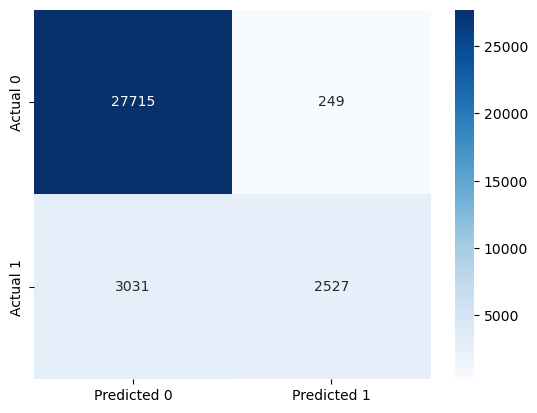

In [67]:
#Performance metrics computation for the optimum decision threshold probability - training data
desired_threshold = 0.875978
#choosing this threshold bc it has a very high accuracy and precision both around 88%

y_pred_prob = model.predict_proba(X_train)[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_train))  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_train, y_pred_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_train, y_pred))
print("Recall: ", recall_score(y_train, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_train, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');

Test Accuracy:  0.9033470556649364
Test ROC-AUC:  0.8650724529496144
Test Precision:  0.9077090119435396
Test Recall:  0.4565811032222829


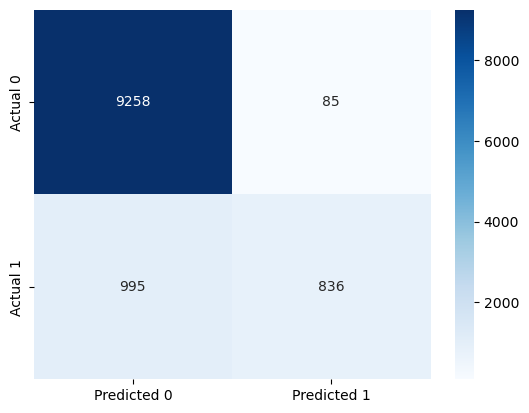

In [68]:
#Performance metrics computation for the optimum decision threshold probability - test data
y_pred_prob = model.predict_proba(X_test)[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Test Accuracy: ",accuracy_score(y_pred, y_test))  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_test, y_pred_prob)
print("Test ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Test Precision: ", precision_score(y_test, y_pred))
print("Test Recall: ", recall_score(y_test, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');

In [4]:
data_full

,belongs_to_collection,budget,popularity,revenue,runtime,title,vote_average,vote_count,Animation,Comedy,...,Mystery,War,Foreign,Music,Documentary,Western,TV Movie,english,release_year,release_month
0,1,30000000,21.946943,1.0,81.0,Toy Story,7.7,5415.0,1,1,...,0,0,0,0,0,0,0,1,1995.0,10.0
1,0,65000000,17.015539,1.0,104.0,Jumanji,6.9,2413.0,0,0,...,0,0,0,0,0,0,0,1,1995.0,12.0
2,1,0,11.712900,0.0,101.0,Grumpier Old Men,6.5,92.0,0,1,...,0,0,0,0,0,0,0,1,1995.0,12.0
3,0,16000000,3.859495,1.0,127.0,Waiting to Exhale,6.1,34.0,0,1,...,0,0,0,0,0,0,0,1,1995.0,12.0
4,1,0,8.387519,1.0,106.0,Father of the Bride Part II,5.7,173.0,0,1,...,0,0,0,0,0,0,0,1,1995.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,0,0.072051,0.0,90.0,Subdue,4.0,1.0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
45462,0,0,0.178241,0.0,360.0,Century of Birthing,9.0,3.0,0,0,...,0,0,0,0,0,0,0,0,2011.0,11.0
45463,0,0,0.903007,0.0,90.0,Betrayal,3.8,6.0,0,0,...,0,0,0,0,0,0,0,1,2003.0,8.0
45464,0,0,0.003503,0.0,87.0,Satan Triumphant,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,1917.0,10.0
